In [3]:
""" 
[v3] 3/4/22 - using latest version of dataset.

dataset download: https://www.dropbox.com/s/w4c30a92g56aivs/data_030422.zip?dl=0

This tutorial is focused on viewing and analyzing behavior.

The previous tutorial (v2) is similar, but focusing more on preparaing dataset for doing modeling. There is a lot of
overlap. Note that v2 doesnt' work becuase of incompatibility between latest Dataset code and the saved data.

[v2] - now using class Dataset to load data, allows for combining multiple datasets,
doing preprocessing, etc.

Added new functions for plotting tasks, overviews, etc.

New functions for splitting data into train, val, test.

You should run all the preprocessing steps below before passing using motor data as input
for modeling.

** You will need:
- dataset, at https://www.dropbox.com/s/vl1jcq15mktocq1/data_032921.zip?dl=0
--- contains data for 8 datasets (4 per monkey); see below for autoamticlaly concatenating.

** Dependencies:
- pythonlib (https://github.com/lucast4/pythonlib
- pandas, seaborn, and other common packages.

Slides that summarize the experiment, motivation, and findings:
https://docs.google.com/presentation/d/1pg0YQxiqQS9mwe_kU_bcfiIytE4mTc0Xhtz4wISSoE0/edit?usp=sharing (detailed)
https://docs.google.com/presentation/d/1xny1pfSBV9HQJOuxs9WaX6CPvg8qMlfuwMqOMGcSK2g/edit?usp=sharing (concise)

"""

" \n[v3] 3/4/22 - using latest version of dataset.\n\ndataset download: https://www.dropbox.com/s/w4c30a92g56aivs/data_030422.zip?dl=0\n\nThis tutorial is focused on viewing and analyzing behavior.\n\nThe previous tutorial (v2) is similar, but focusing more on preparaing dataset for doing modeling. There is a lot of\noverlap. Note that v2 doesnt' work becuase of incompatibility between latest Dataset code and the saved data.\n\n[v2] - now using class Dataset to load data, allows for combining multiple datasets,\ndoing preprocessing, etc.\n\nAdded new functions for plotting tasks, overviews, etc.\n\nNew functions for splitting data into train, val, test.\n\nYou should run all the preprocessing steps below before passing using motor data as input\nfor modeling.\n\n** You will need:\n- dataset, at https://www.dropbox.com/s/vl1jcq15mktocq1/data_032921.zip?dl=0\n--- contains data for 8 datasets (4 per monkey); see below for autoamticlaly concatenating.\n\n** Dependencies:\n- pythonlib (http

In [1]:
%load_ext autoreload
%autoreload 2

## Load multiple datasets and concatenate into a "Datasets" class object.

In [4]:
import pandas as pd
import pickle 
from pythonlib.dataset.dataset import Dataset
from pythonlib.dataset.dataset_preprocess.general import preprocessDat

In [7]:
expt = 'gridlinecircle'
path_list = [
    "data_030421/Pancho-gridlinecircle-baseline-210824_002447",
    "data_030421/Pancho-gridlinecircle-circletoline-210828_100027",
    "data_030421/Pancho-gridlinecircle-linetocircle-210828_100152",
    "data_030421/Pancho-gridlinecircle-lolli-210903_094051",
]
append_list = None

D = Dataset(path_list, append_list)

----------------
Currently loading: data_030421/Pancho-gridlinecircle-baseline-210824_002447
Loaded metadat:
{'sketchpad_edges': array([[-311.84, -224.8 ],
       [ 311.84,  429.6 ]]), 'metadat_probedat': {'sdate': 210820, 'edate': 210821, 'strokmodel_kind': None, 'strokmodel_tstamp': None, 'datecategories': {'210820': 1, '210821': 1}, 'dates_for_summary': [], 'matchedstrokes': None, 'exptnames': ['gridlinecircle1', 'gridlinecircle2'], 'T1': [], 'G1': [], 'G2': [], 'G3': [], 'G4': [], 'description': '', 'finalized': False, 'good_expt': True, 'expt': 'gridlinecircle', 'task_train_test': {'probe1_liketrain': 'train', 'probe1_nostrokeconstraint': 'train', 'probe2_liketrain': 'train', 'probe2_nostrokeconstraint': 'train', 'probe3_hdpos': 'test', 'probe1': 'train', 'probe2': 'train', 'probe3': 'test', 'probe4': 'test', 'train': 'train'}}, 'filedata_params': {'pix_per_deg': array([[ 26.64621164],
       [-26.64621164]]), 'resolution': (1024, 768), 'animal': 'Pancho', 'basedir': '/data2/anima

In [ ]:
# assert False, "this removes the test task sthat were not done at baseline, but were done for the three grammars"
only_keep_trials_across_groupings = False
# Ideally include all tasks, but if want to compare to baseline, then only include those baseline tasks.
D, GROUPING, GROUPING_LEVELS, FEATURE_NAMES, SCORE_COL_NAMES = preprocessDat(D, expt, 
                                                     only_keep_trials_across_groupings=only_keep_trials_across_groupings)


## PLOTS 

In [8]:
D.Dat


,strokes_task,trial_end_method,online_abort,task_stagecategory,origin,donepos,motortiming,motorevents,holdtime,delaytime,...,numstrokes,strokes_beh,expt,monkey_train_or_test,tvalfake,tvalday,epoch,aborted,character,insummarydates
0,"[[[-221.312, 248.32000000000005, 0.0], [-215.0...",report_raise,None,_line,"[-0.0, -153.60000000000002]",None,"{'nstrokes': 1, 'time_go2raise': nan, 'time_ra...","{'go_cue': 2.797763199999991, 'raise': nan, 'o...",573.224026,NaN,...,NaN,"[[[-68.99892105349146, 232.99942867761496, 3.0...",gridlinecircle,train,0.500278,0.6,1,False,_line,False
1,"[[[-75.39200000000005, 248.32000000000005, 0.0...",report_raise,None,_line,"[-0.0, -153.60000000000002]",None,"{'nstrokes': 1, 'time_go2raise': nan, 'time_ra...","{'go_cue': 1.8968383999999927, 'raise': nan, '...",529.193592,NaN,...,NaN,"[[[72.99475633526666, 254.0008292870097, 2.2],...",gridlinecircle,train,0.500505,0.6,1,False,_line,False
2,"[[[-75.39200000000005, -43.51999999999998, 0.0...",report_raise,None,_line,"[-0.0, -153.60000000000002]",None,"{'nstrokes': 1, 'time_go2raise': 0.03733819999...","{'go_cue': 1.9146618000000046, 'raise': 1.952,...",558.982409,NaN,...,NaN,"[[[82.00468927866255, -44.99891062772748, 2.19...",gridlinecircle,train,0.500732,0.6,1,False,_line,False
3,"[[[-221.312, -43.51999999999998, 0.0], [-215.0...",report_raise,None,_line,"[-0.0, -153.60000000000002]",None,"{'nstrokes': 1, 'time_go2raise': 0.03860439999...","{'go_cue': 2.0813956000000076, 'raise': 2.12, ...",519.517833,NaN,...,NaN,"[[[-59.00751235584788, -51.00079842226288, 2.3...",gridlinecircle,train,0.500909,0.6,1,False,_line,False
4,"[[[70.52799999999999, 248.32000000000005, 0.0]...",report_raise,None,_line,"[-0.0, -153.60000000000002]",None,"{'nstrokes': 1, 'time_go2raise': nan, 'time_ra...","{'go_cue': 1.6979774000000134, 'raise': nan, '...",524.764931,NaN,...,NaN,"[[[245.0003132484127, 249.99964640772413, 2.05...",gridlinecircle,train,0.501111,0.6,1,False,_line,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120,"[[[0.00027693027915631774, 27.008000000508616,...",pressed_done_button,None,mixture2,"[-0.0, -153.60000000000002]","[[-0.0, -296.96000000000004]]","{'nstrokes': 4, 'time_go2raise': nan, 'time_ra...","{'go_cue': 2.5968679000006887, 'raise': nan, '...",640.944574,NaN,...,-0.0,"[[[-144.99901363281168, 9.999647049273321, 2.8...",gridlinecircle,train,13.212222,13.6,4,False,mixture2,False
5121,"[[[165.37627693027915, -138.3679999994913, 0.0...",pressed_done_button,None,mixture2,"[-0.0, -153.60000000000002]","[[-0.0, -296.96000000000004]]","{'nstrokes': 5, 'time_go2raise': 0.10285819999...","{'go_cue': 2.281141800000114, 'raise': 2.384, ...",564.985971,NaN,...,NaN,"[[[-160.0032991297235, -145.93893977141198, 2....",gridlinecircle,undefined,13.212677,13.6,4,False,mixture2_1-savedset-1-73112,False
5122,"[[[-165.37572306972083, 192.38400000050865, 0....",pressed_done_button,None,mixture2,"[-0.0, -153.60000000000002]","[[-0.0, -296.96000000000004]]","{'nstrokes': 4, 'time_go2raise': 0.07024130000...","{'go_cue': 4.497758699999395, 'raise': 4.568, ...",645.906061,NaN,...,-0.0,"[[[12.998120268903442, -132.00057947885892, 4....",gridlinecircle,train,13.213510,13.6,4,False,mixture2,False
5123,"[[[89.98400000000002, -62.975999999999885, 0.0...",pressed_done_button,None,mixture2,"[-0.0, -153.60000000000002]","[[-0.0, -296.96000000000004]]","{'nstrokes': 4, 'time_go2raise': 0.13623650000...","{'go_cue': 2.4477634999993825, 'raise': 2.584,...",524.597826,NaN,...,-0.0,"[[[-147.99976336793887, -142.99803139688694, 2...",gridlinecircle,train,13.213965,13.6,4,False,mixture2,False


/Users/lucas/code/pythonlib/pythonlib/drawmodel/strokePlots.py:173: RuntimeWarning: invalid value encountered in long_scalars
  col = colorGradient((v-vmin)/(vmax-vmin), cmap=cmap)
/Users/lucas/code/pythonlib/pythonlib/drawmodel/strokePlots.py:173: RuntimeWarning: invalid value encountered in long_scalars
  col = colorGradient((v-vmin)/(vmax-vmin), cmap=cmap)


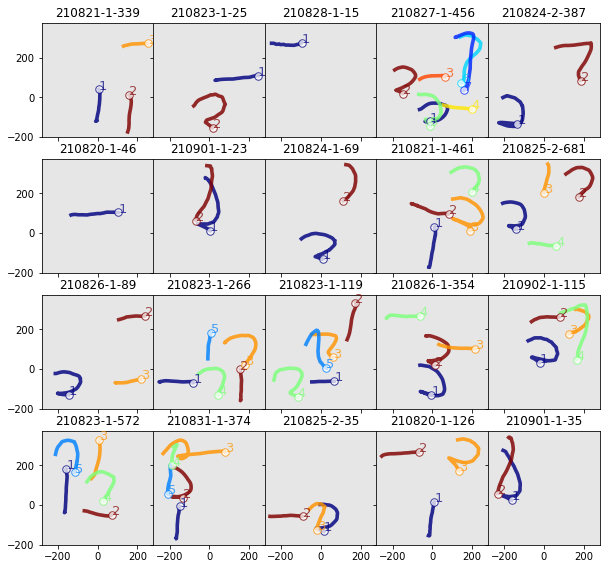

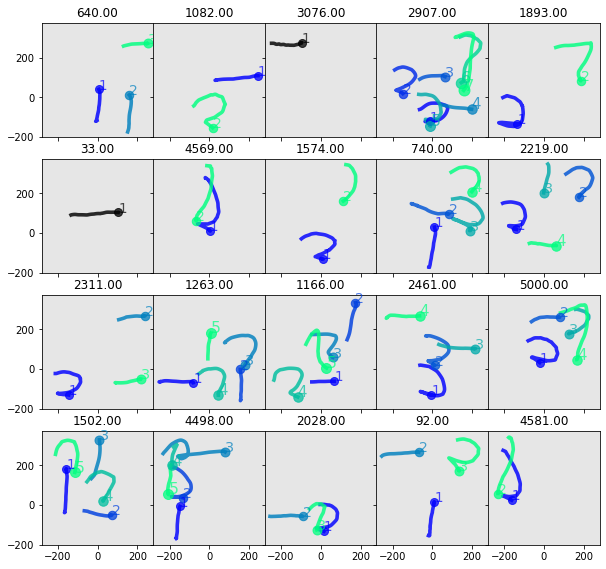

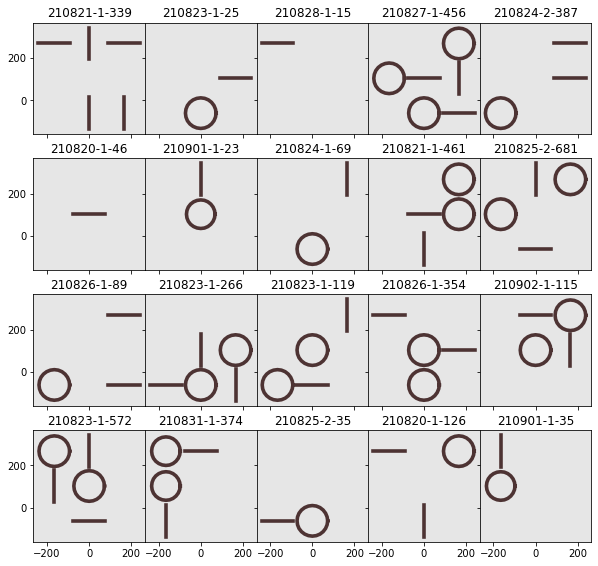

In [6]:
# Plot 20 random trials, showing behavior
k = 20
fig1, idxs = D.plotMultTrials(k, which_strokes="strokes_beh", return_idxs=True);

# Plot those same trials, but coloring by order.
# This is useful for seeing the sequencing of the strokes.
strokes_list = [D.Dat.iloc[i]["strokes_beh"] for i in idxs]
D.plotMultStrokesByOrder(strokes_list, titles=idxs);

# Now plot the stimulus images for these same trials.
fig2 = D.plotMultTrials(idxs, which_strokes="strokes_task");


# There are many flags to modify the plotting in the above functions. There are also many other plotting function
# that operate on Datasets in pythonlib.dataset.plots


/Users/lucas/opt/miniconda3/envs/drag2/lib/python3.9/site-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7ff86ac7b760> has a label of '_line' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)
/Users/lucas/opt/miniconda3/envs/drag2/lib/python3.9/site-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7ff86ac7b760> has a label of '_circle' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


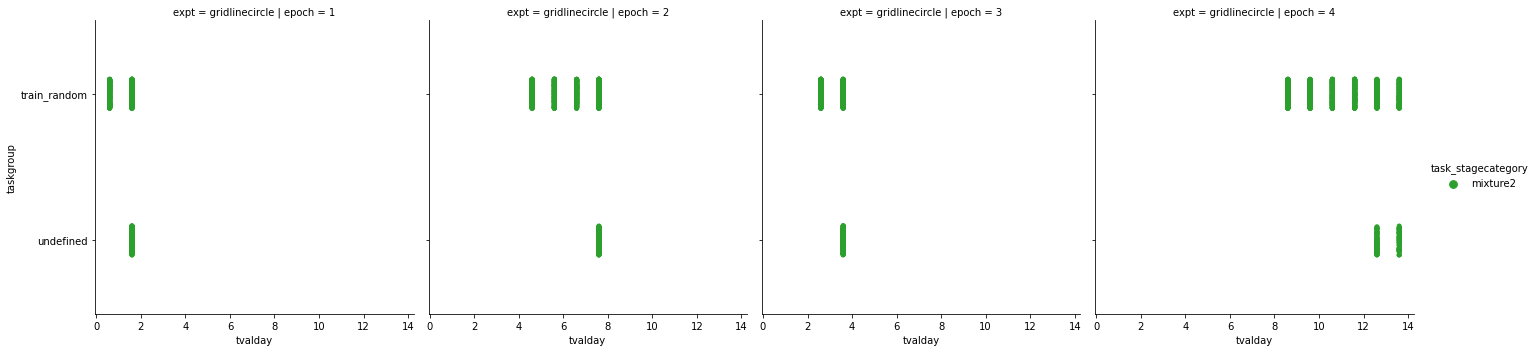

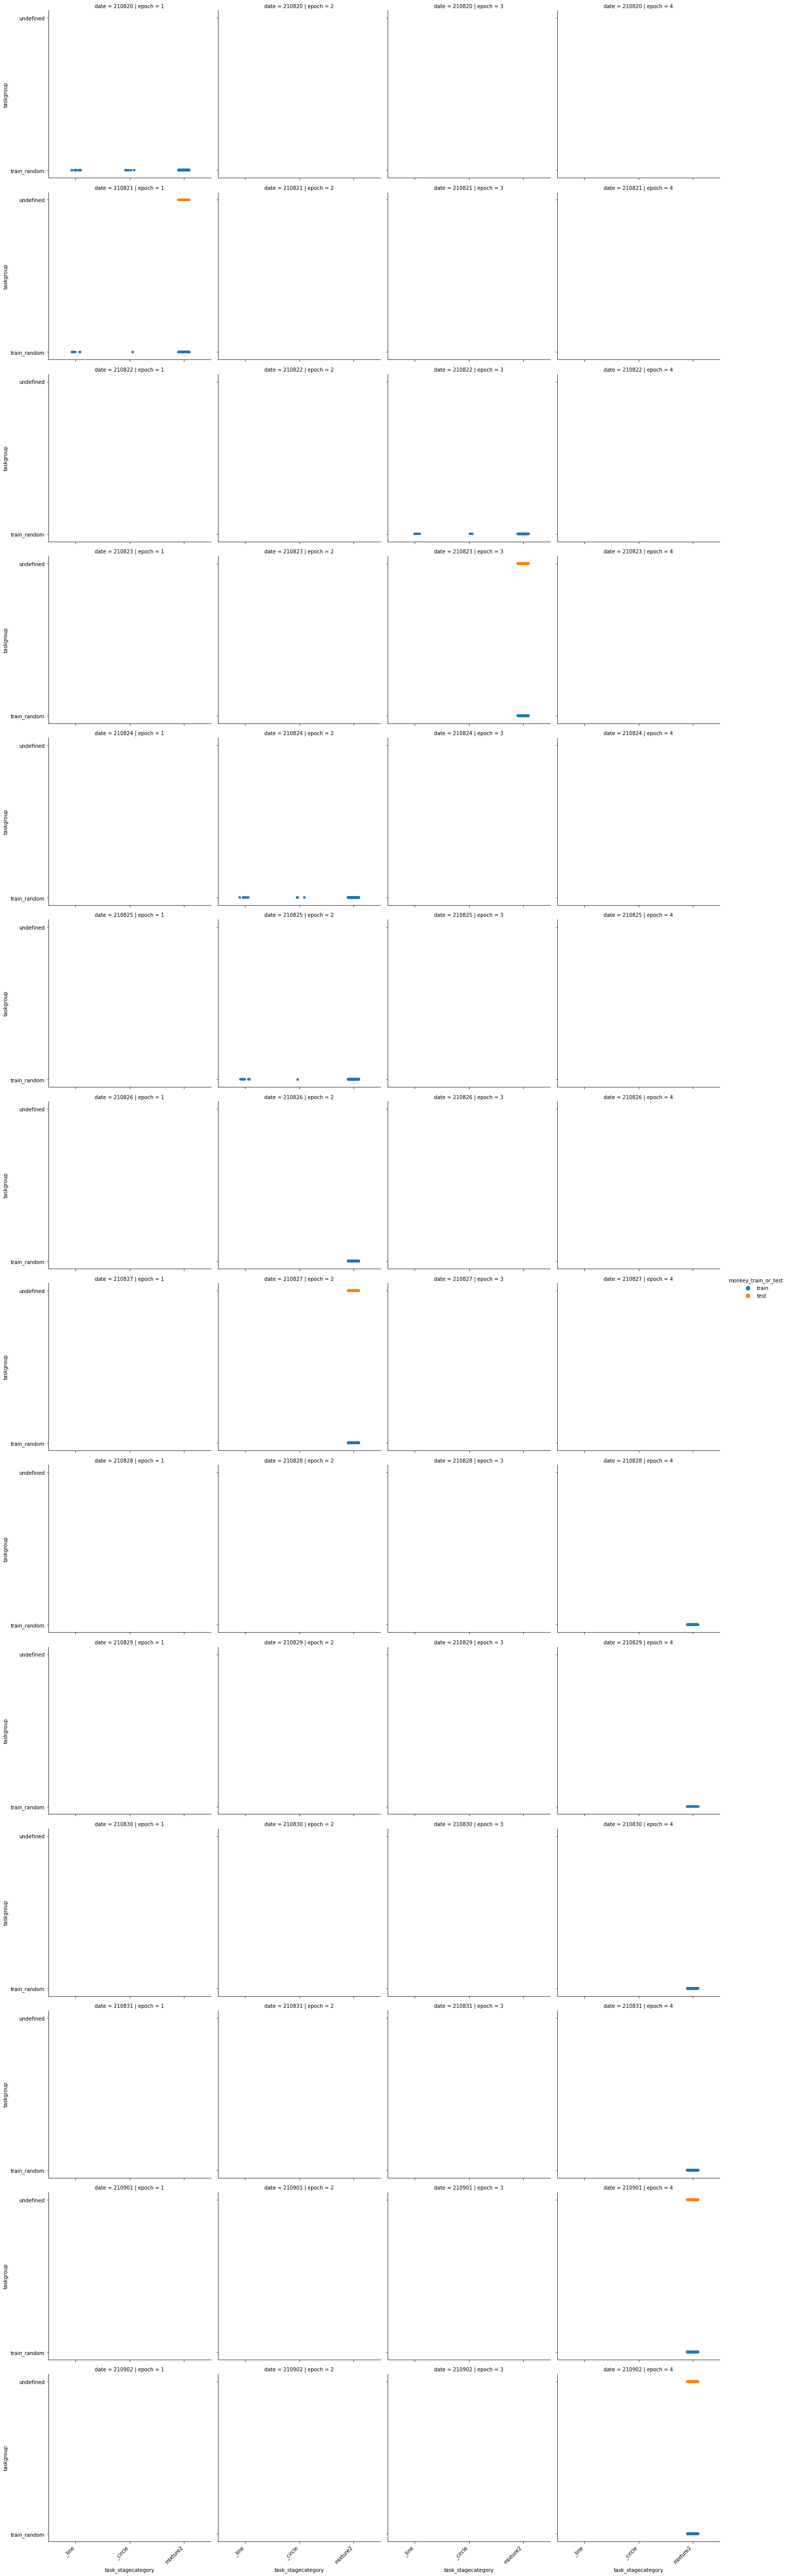

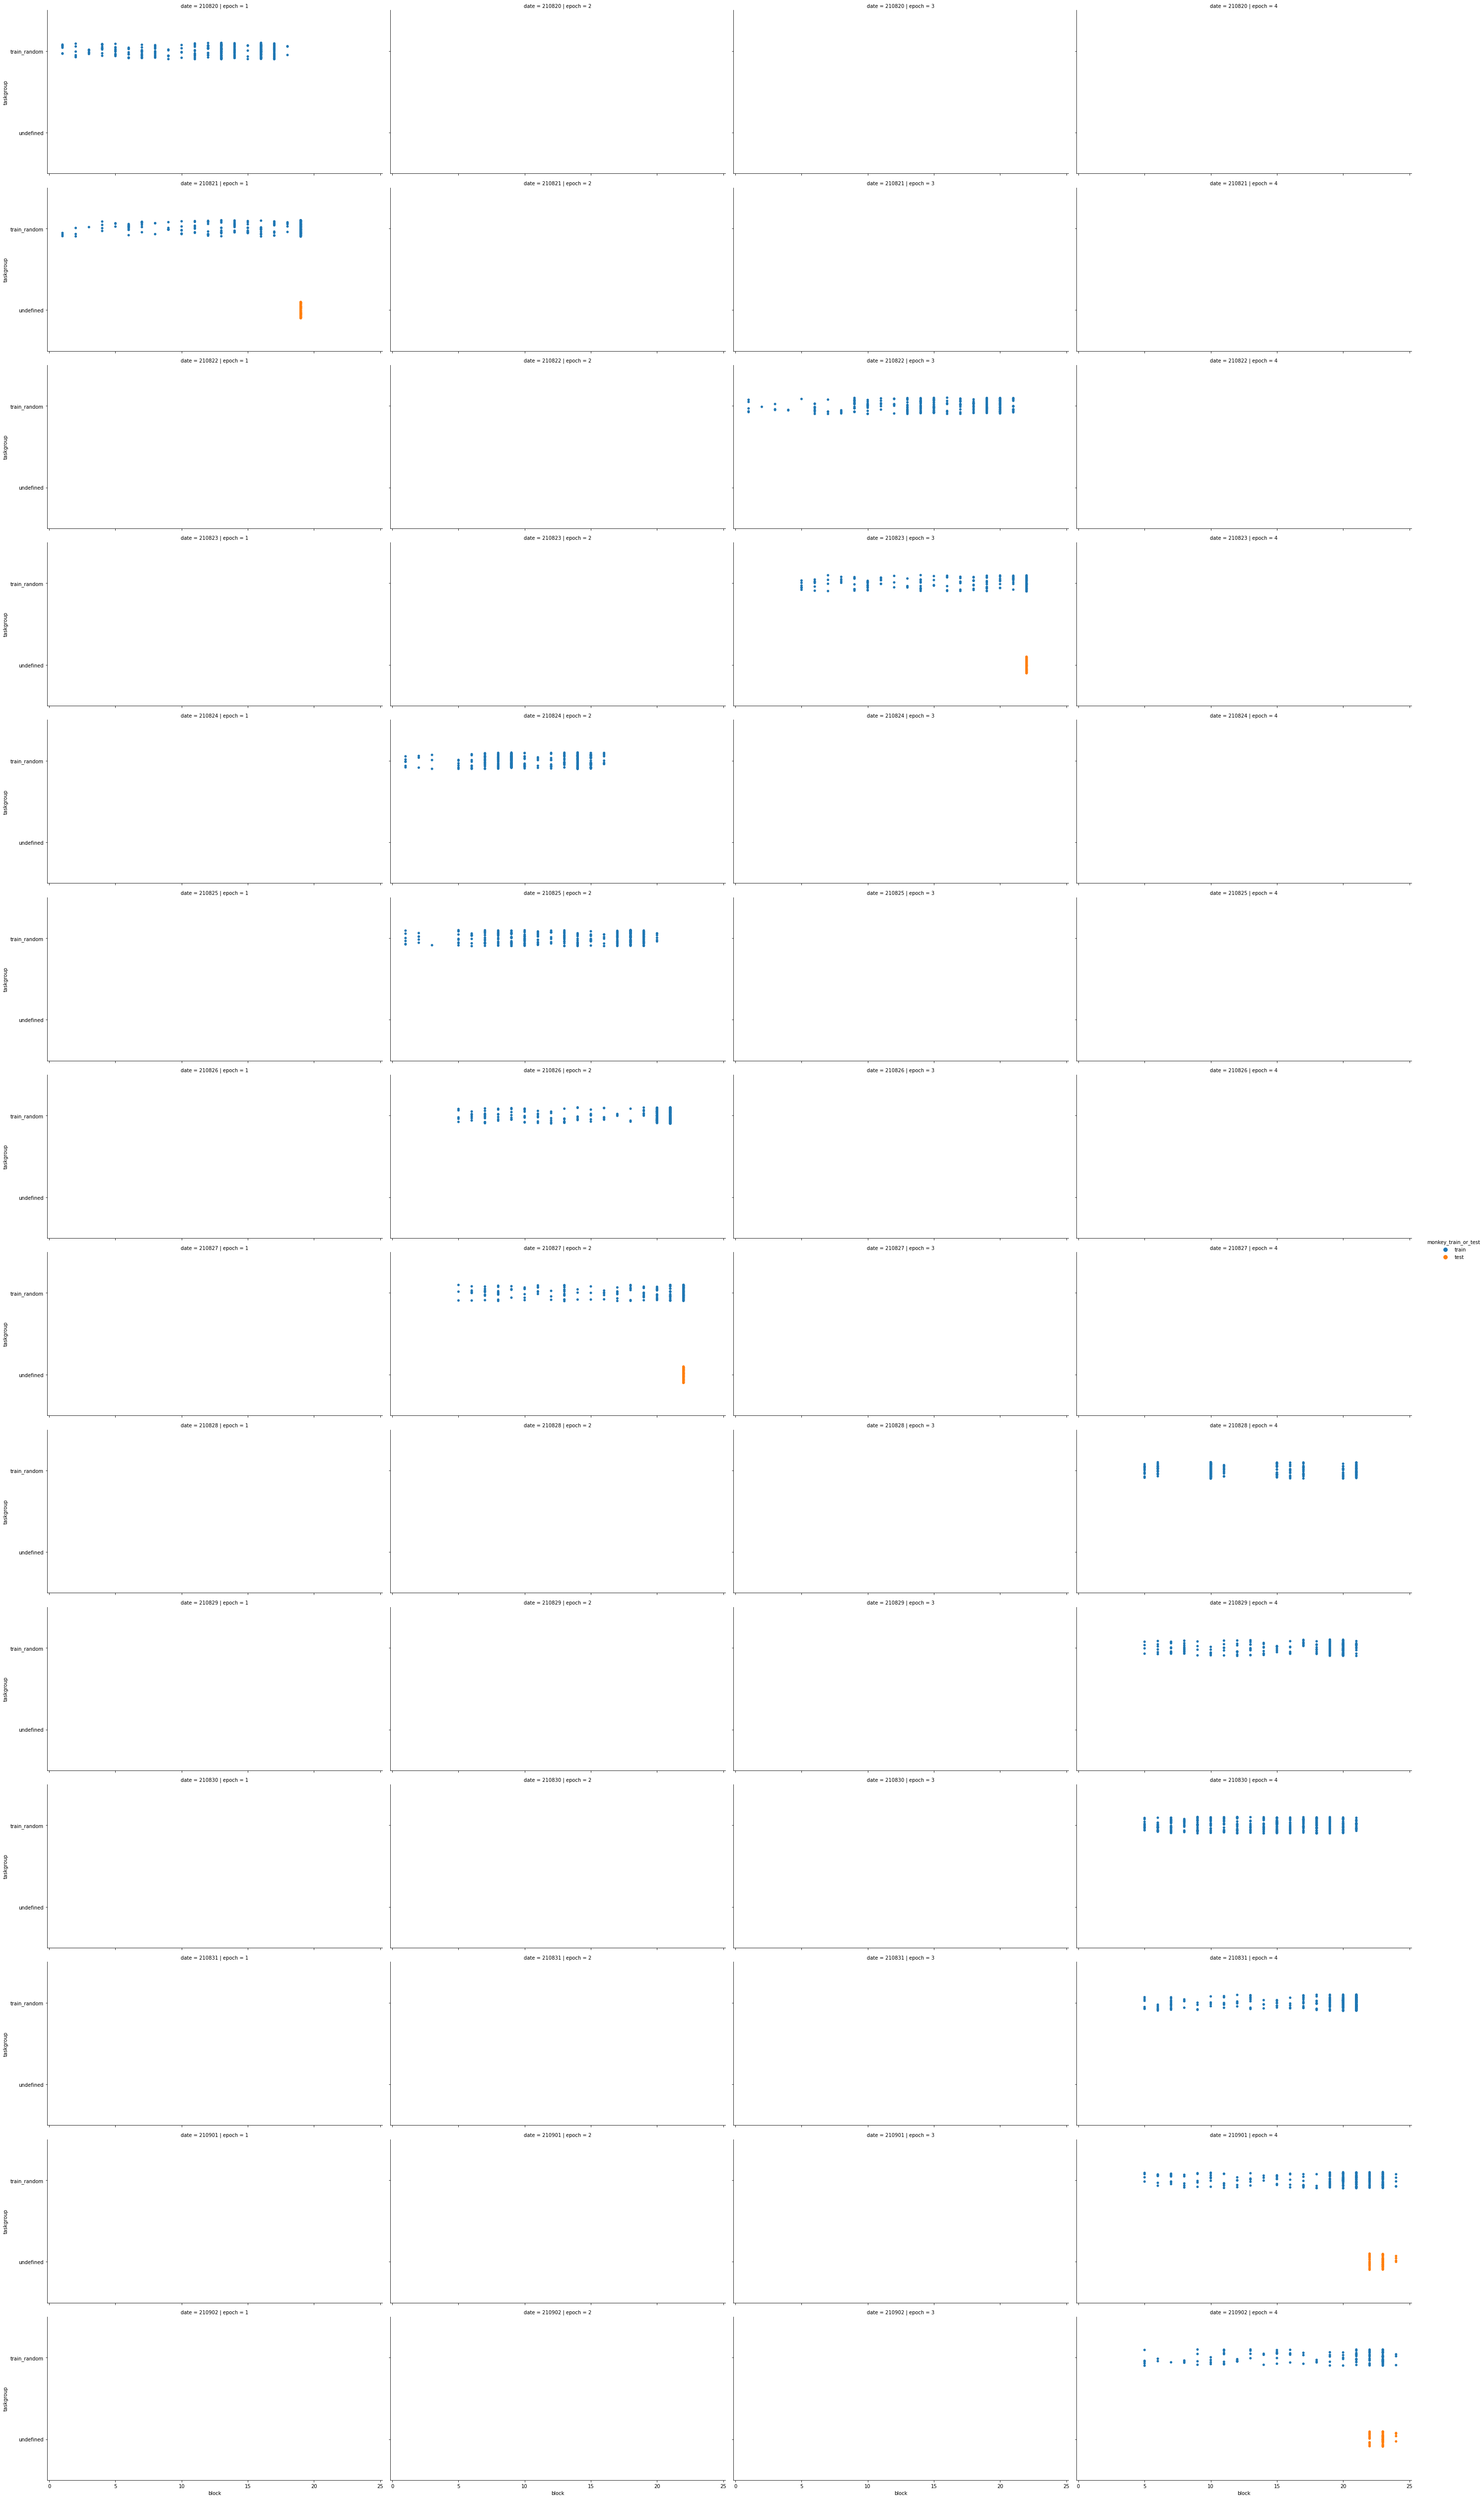

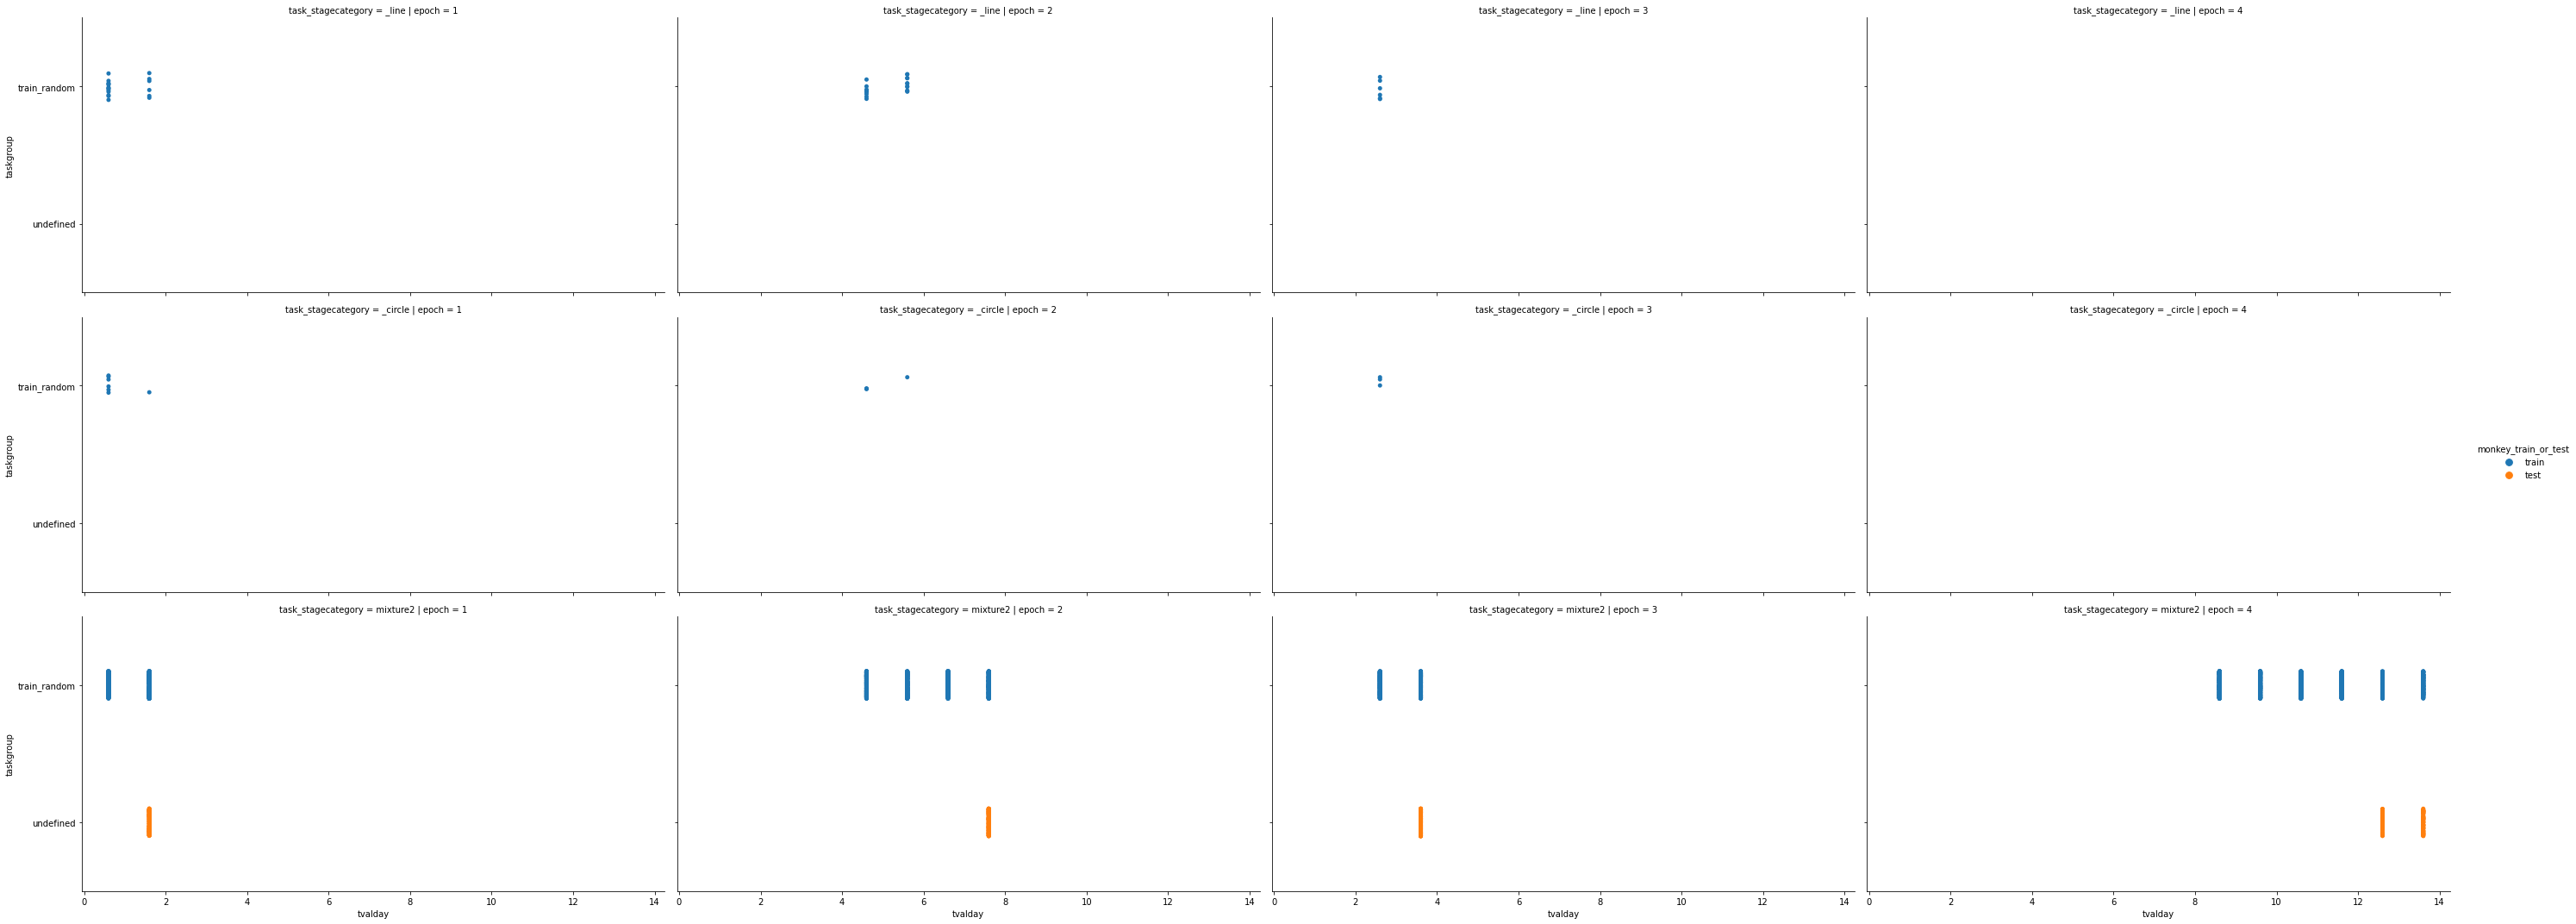

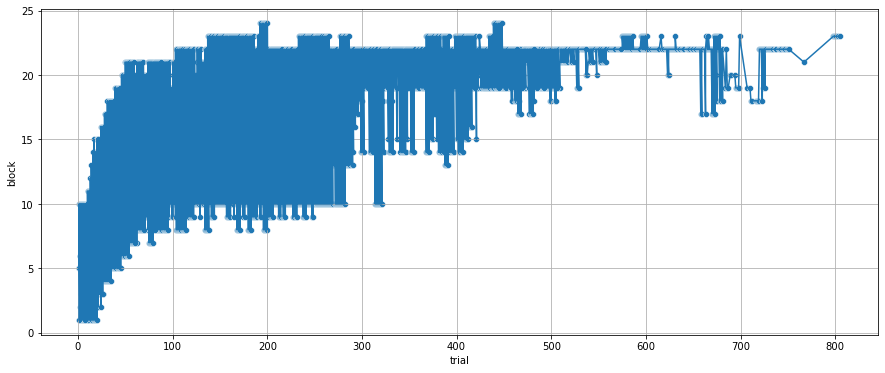

In [7]:
# These are useful plots showing the overview of the experiment.
# There were four epochs in the experiment gridlinecircle:
# 1. baseline
# 2. linetocircle
# 3. circletoline
# 4. lolli.

# More general notes about how experimental timelines work:
## EXPERIEMNTAL STRUCTURE/TIMELINE
# There are two epochs, each epoch having its set of training and tests tasks. 

# Across days, it goes like this:
# Epoch 1 (Train) --> Epoch 1 (Test) --> Epoch 2 (Train) --> Epoch 2 (Test)

# Ideally, you train seprate models for Epochs 1 and 2, since the idea is that the monkey is laerning different

# Priors in the two epochs (Train) then being tested on similar test tasks (Test).

# To visualize the experimental structure:
# notes:
# - tvalday is time of trial. e..g, the first digit is the day, the value after decimal is fraction of day (not
# exactly from midnight to midnight, but within the "experimental session"). so 2.5 means day 1, halfway through the 
# day (from start of expt to end of expt)
# - to get the actual time, see "tval" qwhich is fraction of day from 0:00 to 24:00


figlist = D.plotOverview()

# you might want to save figlist to view, since hard to see in browser.
SDIR = "/tmp" # fill this in. e.g, "/tmp"
for i, fig in enumerate(figlist):
    fig.savefig(f"{SDIR}/overview_{i}.pdf")

/Users/lucas/code/pythonlib/pythonlib/drawmodel/strokePlots.py:173: RuntimeWarning: invalid value encountered in long_scalars
  col = colorGradient((v-vmin)/(vmax-vmin), cmap=cmap)
/Users/lucas/code/pythonlib/pythonlib/drawmodel/strokePlots.py:173: RuntimeWarning: invalid value encountered in long_scalars
  col = colorGradient((v-vmin)/(vmax-vmin), cmap=cmap)
/Users/lucas/code/pythonlib/pythonlib/drawmodel/strokePlots.py:173: RuntimeWarning: invalid value encountered in long_scalars
  col = colorGradient((v-vmin)/(vmax-vmin), cmap=cmap)


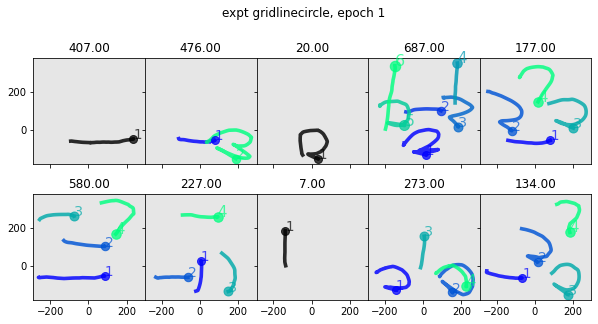

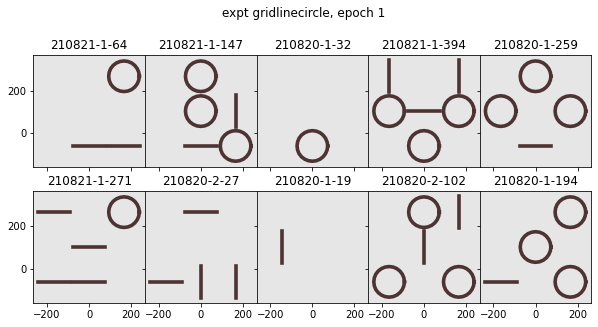

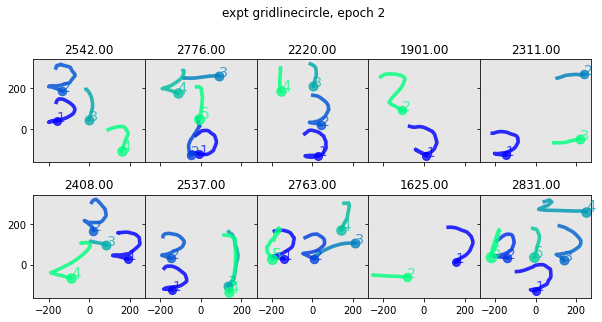

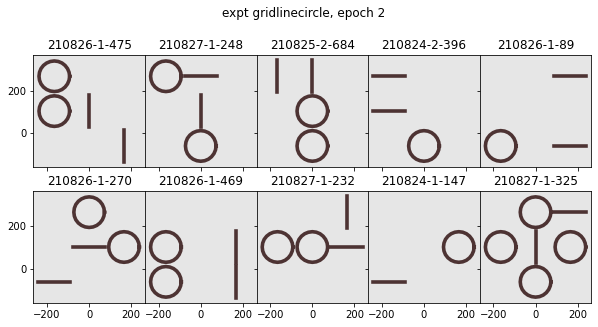

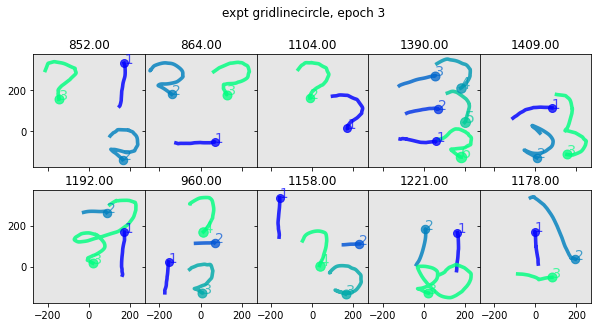

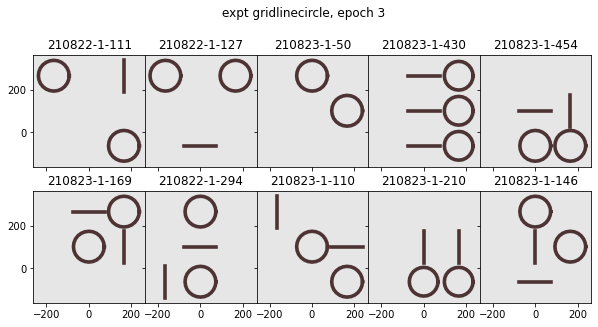

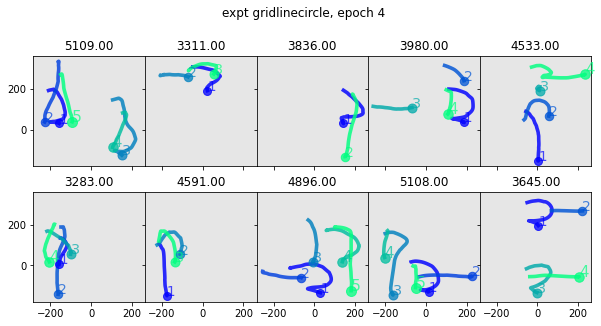

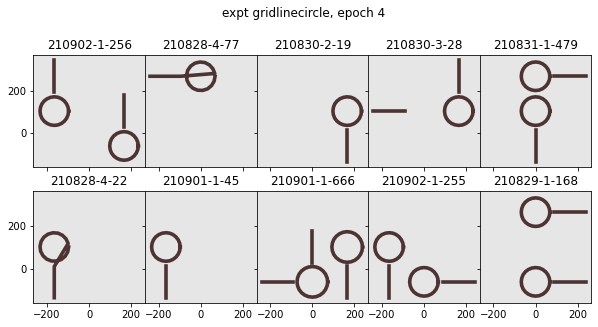

In [8]:
# === Plot random trials, split by experiment and epoch. 
# Note the changes in image structure across expts and epochjs.
import random
k = 10
exptlist = set(D.Dat["expt"])
epochlist = set(D.Dat["epoch"])
for expt in exptlist:
    for epoch in epochlist:
        df = D.Dat[(D.Dat["expt"]==expt) & (D.Dat["epoch"]==epoch)]
        if len(df)==0:
            continue
        inds = random.sample(list(df.index), k)
        
#         fig1 = D.plotMultTrials(inds, which_strokes="strokes_beh")
        strokes_list = [D.Dat.iloc[i]["strokes_beh"] for i in inds]
        fig1,_ = D.plotMultStrokesByOrder(strokes_list, titles=inds);

        fig2 = D.plotMultTrials(inds, which_strokes="strokes_task")
        fig1.suptitle(f"expt {expt}, epoch {epoch}")
        fig2.suptitle(f"expt {expt}, epoch {epoch}")
        

### Other possibly useful plotting functions

In [1]:
# == Plot a single trial. showing spatial and temporal data
ind = 200
D.plotSingleTrial(ind);

NameError: name 'D' is not defined

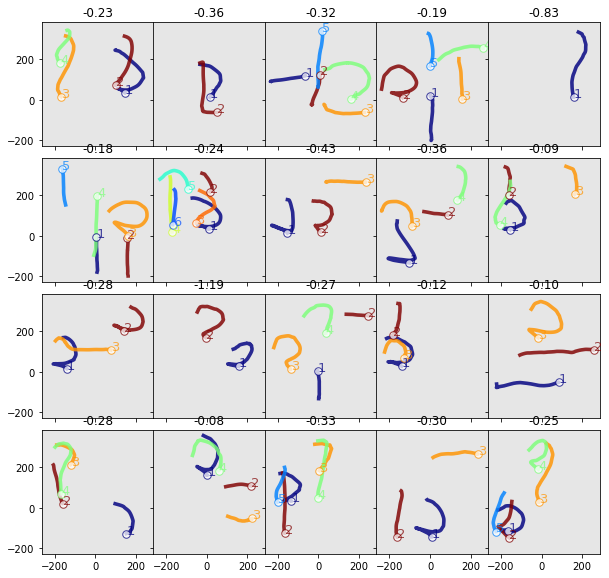

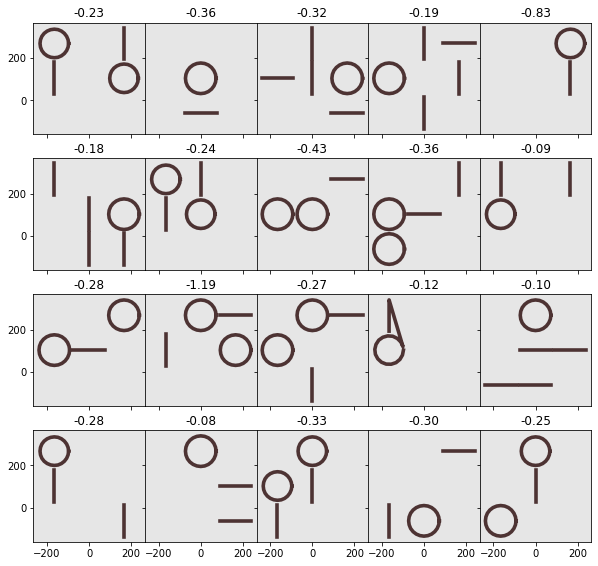

In [10]:
# Filter to specific task of interest, and plot with overlay behavioral score (hausdorff)
df = D.Dat[(D.Dat["random_task"]==True)]

import random
inds = random.sample(list(df.index), 20)

scores = [D.Dat["hausdorff"].values[i] for i in inds]
D.plotMultTrials(inds, titles=scores);
D.plotMultTrials(inds, titles=scores, which_strokes="strokes_task");

## Preprocessing steps [OPTIONAL]

In [11]:
if False:
    # IGNore for now, not important for most data analyses. just for modeling.
    # recenter tasks (so they are all similar spatial coords)
    D.recenter(method="each_beh_center")

    # interpolate beh (to reduce number of pts)
    D.interpolateStrokes()

    # subsample traisl in a stratified manner to amke sure good represnetaiton
    # of all variety of tasks.
    D.subsampleTrials()

    # Recompute task edges (i..e, bounding box)
    D.recomputeSketchpadEdges()

## Split into training and testing tasks [optional]

NOTE: THIS IS UPDATED TO MAKE SURE GOOD REPRESENTATION

In [12]:
# IGNORE FOR Now, more relevant for modeling stuff.

In [13]:
########## Ver 1: mix all the data (ignoring what were in same experiments for monkey) and split evenly. 
# Useful if want to train model to capture diversity of behavior
inds_train, inds_val, inds_test = D.splitTrainTest()

TODO: Alternatively, can split similar to how monkey experienced
got this many (train, val, test)
4401 362 362


In [14]:
########## Ver 2: Extract train and test tasks exactly as monkey got.
# Do this focusing on a single expeirment and epoch. 
expt = "lines5" 
epoch = 1
inds_train, inds_val, inds_test = D.splitTrainTestMonkey(expt=expt, val = 0.05, epoch=epoch)

Got this many train, val, test inds
0 0 0


In [15]:
# First pass, try the following experiments and epochs, training four separate models (two animals, two epochs) 
expt = "lines5"
epochlist = [1, 2]
for epoch in epochlist:
    
    # This is new dataset for training a new model.
    inds_train, inds_val, inds_test = D.splitTrainTestMonkey(expt=expt, val = 0.05, epoch=epoch)

Got this many train, val, test inds
0 0 0
Got this many train, val, test inds
0 0 0


In [16]:
# Use this to print sample size for different groupings of data. 
# - monkey_train_or_test, whether was train or test task for monkey. 
# - expt, experiment
# - epoch, stage within an experiment
# - task_stagecategory, category of image, sort of like an "alphabet" or generative model.
# D.Dat.groupby(["monkey_train_or_test", "expt", "epoch", "task_stagecategory"]).count()
D.Dat.groupby(["monkey_train_or_test", "expt", "epoch"]).count()

strokes_task  trial_end_method  \
monkey_train_or_test expt           epoch                                   
test                 gridlinecircle 1               139               139   
                                    2               197               197   
                                    3               220               220   
                                    4               152               152   
train                gridlinecircle 1               642               642   
                                    2              1354              1354   
                                    3               524               524   
                                    4              1897              1897   

                                           online_abort  task_stagecategory  \
monkey_train_or_test expt           epoch                                     
test                 gridlinecircle 1                 0                 139   
                                    2                 0                 197   
                                    3                 0                 220   
                                    4                 0                 152   
train                gridlinecircle 1                 0                 642   
                                    2                 0                1354   
                                    3                 0                 524   
                                    4                 0                1897   

                                           origin  donepos  motortiming  \
monkey_train_or_test expt           epoch                                 
test                 gridlinecircle 1         139      139          139   
                                    2         197      197          197   
                                    3         220      220          220   
                                    4         152      152          152   
train                gridlinecircle 1         642      616          642   
                                    2        1354     1330         1354   
                                    3         524      515          524   
                                    4        1897     1897         1897   

                                           motorevents  holdtime  delaytime  \
monkey_train_or_test expt           epoch                                     
test                 gridlinecircle 1              139       139          0   
                                    2              197       197          0   
                                    3              220       220          0   
                                    4              152       152          0   
train                gridlinecircle 1              642       642          0   
                                    2             1354      1354          0   
                                    3              524       524          0   
                                    4             1897      1897          0   

                                           ...  trialcode  which_metadat_idx  \
monkey_train_or_test expt           epoch  ...                                 
test                 gridlinecircle 1      ...        139                139   
                                    2      ...        197                197   
                                    3      ...        220                220   
                                    4      ...        152                152   
train                gridlinecircle 1      ...        642                642   
                                    2      ...       1354               1354   
                                    3      ...        524                524   
                                    4      ...       1897               1897   

                                           numstrokes  strokes_beh  tvalfake  \
monkey_train_or_test expt           epoch                 

In [17]:
# Plot, separating by train/test split
# == Similar, but split by train ,test, val, to see that
# they should be similar, since they are sampled from same poool.
_, idxs = D.plotMultTrials(inds_train[:20], return_idxs=True);
D.plotMultTrials(idxs, which_strokes="strokes_task")
_, idxs = D.plotMultTrials(inds_val[:20], return_idxs=True);
D.plotMultTrials(idxs, which_strokes="strokes_task")
_, idxs = D.plotMultTrials(inds_test[:20], return_idxs=True);
D.plotMultTrials(idxs, which_strokes="strokes_task")

TypeError: cannot unpack non-iterable NoneType object

# BELOW: old notes, from data_exploration_tutorial(v1). 

Still appropriate, but mostly has been wrapped into the Dataset class.


In [ ]:
dat = D.Dat
metadat = D.Metadats

## BASICS

In [ ]:
# each row of dat is a trial (a single image + behavior).

# - motor behavior is saved in "strokes_beh"
# - stroke_beh is a list of np arrays, each array is shape (N, 3), where N is number timepoints and
# 3 is (x, y, t) coordiantes. x and y are in pixels (centered at 0) and t is seconds rel trial onset.
# - len(strokes_beh) tells you how many independent segments were in the motor behavior (i.e,., each segment
# is touch --> draw --> lift.
trial = 50
# print(dat["strokes_beh"][trial])
print("num segmetns in this trial:")
print(len(dat["strokes_beh"][trial]))


# -Stimuli are saved in the exact same way, except the order of segments is meaningless
# and is therefore arbitrary. there is a still a time coordinate, but it is just indices from 0, 1, ..
print("task stimulus")
print(dat["strokes_task"][trial])



## normalizing units for data and images


In [ ]:
# This holds the edges of sketchpad, in same units as data (pixels), in format:
# [[-x, -y], [+x +y]], i..e, the limits of the "sketchpad". 
# - You can normalize units relative to these bounds, if needed
metadat["sketchpad_edges"]